## Tic-Tac-Toe Agent
​
In this notebook, you will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries
Write the code to import Tic-Tac-Toe class from the environment file

In [23]:
from TCGame_Env import TicTacToe 
import collections
import numpy as np
import random
import pickle
import time
from matplotlib import pyplot as plt

In [24]:
env = TicTacToe() # Defining the MDP*

In [25]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x
 
def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [26]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):

    valid_Actions = []
    
    valid_Actions = [i for i in env.action_space(state)[0]] ###### -------please call your environment as env
    return valid_Actions

In [27]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)
    
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action]=0

#### Epsilon-greedy strategy - Write your code here

(you can build your epsilon-decay function similar to the one given at the end of the notebook)

In [28]:
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy

def epsilon_greedy(state, time):
    epsilon = MIN_EPSILON + (MAX_EPSILON - MIN_EPSILON) * np.exp(-DECAY_RATE*time)
    z = np.random.random()
        
    if z > epsilon:
        state1 = Q_state(state)
        action = max(Q_dict[state1],key=Q_dict[state1].get)   #Exploitation: this gets the action corresponding to max q-value of current state
    else:
        agent_actions, env_actions = env.action_space(state) #Exploration: randomly choosing and action
        agent_actions = list(agent_actions)
        # action = agent_actions[np.random.choice(range(len(agent_actions)))]
        action = random.choice(list(agent_actions))

    return action

#### Tracking the state-action pairs for checking convergence - write your code here

In [29]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)
Q_dict = collections.defaultdict(dict)
States_track = collections.defaultdict(dict)

In [30]:
# Initialise states to be tracked : Q(s,a) pairs 
def initialise_tracking_states():
    sample_q_values = [('x-x-x-x-x-x-x-x-x', (7,1)), \
                       ('x-x-x-x-x-x-x-x-x', (0,3)), \
                       ('x-x-x-x-x-x-x-x-x',(4, 1)), \
                       ('x-x-x-x-x-x-x-x-x',(8, 3))]    #select some 4 Q-values   
    for q_values in sample_q_values:
        state = q_values[0]
        action = q_values[1]
        States_track[state][action] = []
  

In [31]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [32]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

In [33]:
initialise_tracking_states()

#### Define hyperparameters  ---write your code here

In [34]:
MAX_EPSILON = 1.0
MIN_EPSILON = 0.001
EPISODES = 90000
DECAY_RATE = 0.0001
LR = 0.01
GAMMA = 0.91
THRESHOLD = 500
POLICY_THRESHOLD = 1000 

### Q-update loop ---write your code here

In [35]:
import time 
start_time = time.time()

for episode in range(EPISODES):
    env = TicTacToe() # call the environment
    curr_state = env.state    
    done = False  
    add_to_dict(curr_state)  # adding the current state to dictionary

    if episode % 5000 == 0:
        print("Episode: {}".format(episode))

    while not done:  
        curr_state1 = Q_state(curr_state)
        curr_action = epsilon_greedy(curr_state, episode)   # applying epislon method
        next_state, reward, done = env.step(curr_state, curr_action) # Take a step and get rewards and appropriate next state
        next_state_temp = Q_state(next_state)
        add_to_dict(next_state)

        # Updating rules
        if not done:
            max_next = max(Q_dict[next_state_temp],key=Q_dict[next_state_temp].get)  
            # Get action according to the MAX-Q value of the next state
            Q_dict[curr_state1][curr_action] += LR * ((reward + (GAMMA*(Q_dict[next_state_temp][max_next])))
                                                      - Q_dict[curr_state1][curr_action] ) 
        else:
            Q_dict[curr_state1][curr_action] += LR * ((reward - Q_dict[curr_state1][curr_action]))

        # Set the next state as current state
        curr_state = next_state
        
     #states tracking   
    if ((episode+1)%THRESHOLD)==0:
        save_tracking_states()
        save_obj(States_track,'States_tracking')

    if ((episode+1)% POLICY_THRESHOLD) == 0:  #every 5000th episodes, the Q-dict will be saved
        save_obj(Q_dict,'Policy_Q_dict')  
        

elapsed_time = time.time() - start_time
print("Time taken in seconds: ", elapsed_time)
save_obj(States_track,'States_tracking')   
save_obj(Q_dict,'Policy_Q_dict')

Episode: 0
Episode: 5000
Episode: 10000
Episode: 15000
Episode: 20000
Episode: 25000
Episode: 30000
Episode: 35000
Episode: 40000
Episode: 45000
Episode: 50000
Episode: 55000
Episode: 60000
Episode: 65000
Episode: 70000
Episode: 75000
Episode: 80000
Episode: 85000
Time taken in seconds:  70.09317421913147


#### Check the Q-dictionary

In [36]:
Q_dict

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(0, 1): -1.0156544045187703,
              (0, 3): -1.0156553270010873,
              (0, 5): -1.0156559943296948,
              (0, 7): -1.015668547928847,
              (0, 9): -1.0156773746769294,
              (1, 1): -1.0157251138605587,
              (1, 3): -1.0156746026101864,
              (1, 5): -1.0156588550332681,
              (1, 7): -1.0156558239737858,
              (1, 9): -1.0156632299314408,
              (2, 1): -1.0156754545417006,
              (2, 3): -1.0156581854603148,
              (2, 5): -1.015652449304907,
              (2, 7): -1.0156865511572695,
              (2, 9): -1.0156656874329084,
              (3, 1): -1.0156527625604181,
              (3, 3): -1.0156686675848638,
              (3, 5): -1.0156630782241993,
              (3, 7): -1.0156719714427975,
              (3, 9): -1.0156765662050784,
              (4, 1): -1.0156590430094743,
              (4, 3): -1.0157050770248102,
              (4,

In [37]:
len(Q_dict)

222346

In [38]:
# try checking for one of the states - that which action your agent thinks is the best  -----This will not be evaluated
sorted(Q_dict['x-1-x-x-x-x-x-x-2'].items(), key=lambda kv: kv[1], reverse=True)[:10]


[((3, 7), -0.0199),
 ((3, 9), -0.0199),
 ((4, 3), -0.0199),
 ((4, 5), -0.0199),
 ((4, 7), -0.0199),
 ((4, 9), -0.0199),
 ((5, 3), -0.0199),
 ((5, 5), -0.0199),
 ((5, 7), -0.0199),
 ((5, 9), -0.0199)]

In [39]:
sorted(Q_dict['x-x-8-x-5-x-x-x-x'].items(), key=lambda kv: kv[1], reverse=True)[:10]


[((0, 9), -0.0199),
 ((1, 1), -0.0199),
 ((1, 3), -0.0199),
 ((1, 7), -0.0199),
 ((1, 9), -0.0199),
 ((3, 1), -0.0199),
 ((3, 9), -0.0199),
 ((5, 1), -0.0199),
 ((5, 3), -0.0199),
 ((5, 7), -0.0199)]

#### Check the states tracked for Q-values convergence
(non-evaluative)

In [40]:
with open('States_tracking.pkl', 'rb') as handle:
    States_track = pickle.load(handle)

In [41]:
# Write the code for plotting the graphs for state-action pairs tracked

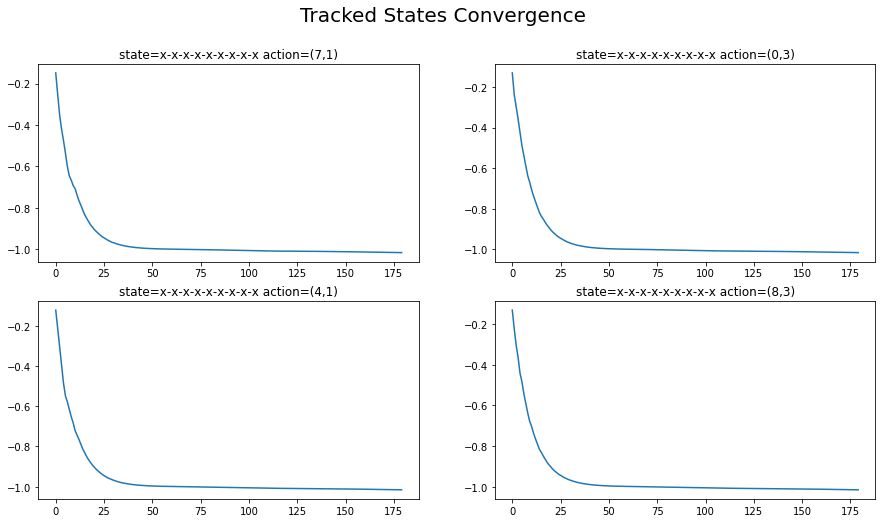

In [42]:
fig = plt.figure(0, figsize=(15,8))
fig.suptitle('Tracked States Convergence', fontsize=20)
plt.subplot(221)
plt.title('state=x-x-x-x-x-x-x-x-x action=(7,1)')
plt.plot(np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(7, 1)]))), \
         np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(7, 1)]))

plt.subplot(222)
plt.title('state=x-x-x-x-x-x-x-x-x action=(0,3)')
plt.plot(np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(0, 3)]))), \
         np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(0, 3)]))

plt.subplot(223)
plt.title('state=x-x-x-x-x-x-x-x-x action=(4,1)')
plt.plot(np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(4, 1)]))), \
         np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(4, 1)]))

plt.subplot(224)
plt.title('state=x-x-x-x-x-x-x-x-x action=(8,3)')
plt.plot(np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(8, 3)]))), \
         np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(8, 3)]))

plt.show()

### Epsilon - decay check

In [45]:
import numpy as np
import matplotlib.pyplot as plt 

MAX_EPSILON = 1.0
MIN_EPSILON = 0.001
EPISODES = 90000
DECAY_RATE = 0.0001
time = np.arange(0,EPISODES)
epsilon = []
for i in range(0,EPISODES):
    epsilon.append(MIN_EPSILON + (MAX_EPSILON - MIN_EPSILON) * np.exp(-DECAY_RATE*i))

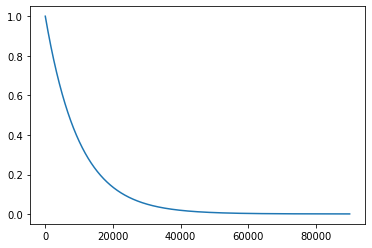

In [47]:
plt.plot(time, epsilon)
plt.show()